In [10]:
# !pip install keras
# !pip install tensorflow

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


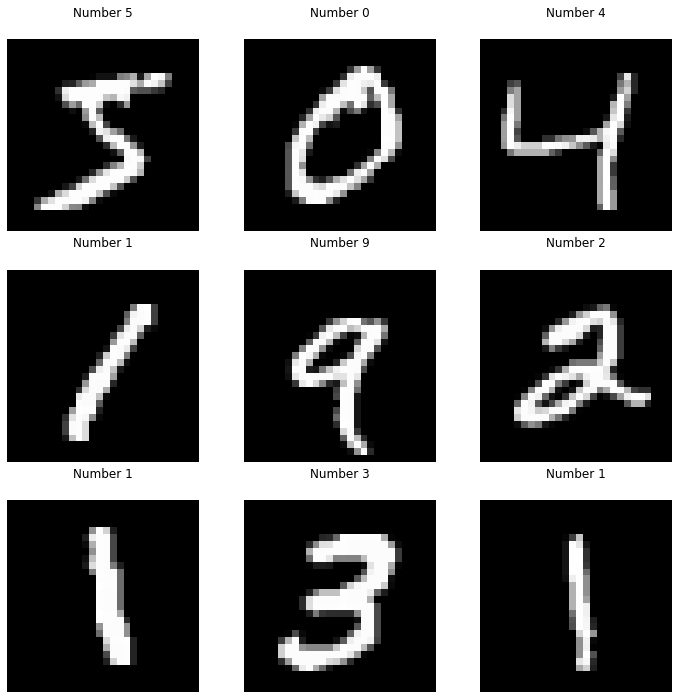

In [12]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

# Training Data: (60000L, 28L, 28L)
# Training Labels: (60000L,)

print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

# Testing Data: (10000L, 28L, 28L)
# Testing Labels: (10000L,)

# EDA

fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    fig.show()

In [13]:
X = x_train.reshape(len(x_train),-1)
Y = y_train

X = X.astype(float) / 255.

X_test  = x_test.reshape(len(x_test),-1)
Y_test = y_test

print(X_test.shape)

print(X.shape)
print(X[0].shape)

(10000, 784)
(60000, 784)
(784,)


In [14]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model

kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data

kmeans.fit(X)

kmeans.labels_

10


C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


array([5, 7, 2, ..., 5, 5, 9])

In [15]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):
        
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
    
    return inferred_labels

In [16]:
def infer_data_labels(X_labels, cluster_labels):
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [17]:
# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print (Y[:20])

[5 0 4 1 7 4 1 8 1 4 8 1 3 6 1 4 8 4 5 4]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [18]:
cluster_labels

{8: [0], 3: [1], 4: [2, 9], 1: [3, 8], 7: [4], 5: [5], 6: [6], 0: [7]}

In [27]:
# # Initialize and fit KMeans algorithm
# kmeans = MiniBatchKMeans(n_clusters = 36)
# kmeans.fit(X)

# # record centroid values
# centroids = kmeans.cluster_centers_

# # reshape centroids into images
# images = centroids.reshape(36, 28, 28)
# images *= 255
# images = images.astype(np.uint8)

# # determine cluster labels
# cluster_labels = infer_cluster_labels(kmeans, Y)

# # create figure with subplots using matplotlib.pyplot
# fig, axs = plt.subplots(6, 6, figsize = (20, 20))
# plt.gray()

# # loop through subplots and add centroid images
# for i, ax in enumerate(axs.flat):
    
#     # determine inferred label using cluster_labels dictionary
#     for key, value in cluster_labels.items():
#         if i in value:
#             ax.set_title('Inferred Label: {}'.format(key))
    
#     # add image to subplot
#     ax.matshow(images[i])
#     ax.axis('off')
    
# # display the figure
# fig.show()

In [20]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [21]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Number of Clusters: 10
Inertia: 2380251.253311637
Homogeneity: 0.4479106421357873
Accuracy: 0.5339



C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Number of Clusters: 16
Inertia: 2205876.4824771276
Homogeneity: 0.5550723341491834
Accuracy: 0.6275166666666666



C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Number of Clusters: 36
Inertia: 1950250.3011419135
Homogeneity: 0.6958057789773793
Accuracy: 0.7759166666666667



C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Number of Clusters: 64
Inertia: 1809216.891159636
Homogeneity: 0.7392571881339755
Accuracy: 0.8051833333333334



C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Number of Clusters: 144
Inertia: 1622385.1179916044
Homogeneity: 0.8121573365307038
Accuracy: 0.8797



C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Number of Clusters: 256
Inertia: 1504411.1181185609
Homogeneity: 0.8436671095554631
Accuracy: 0.9006



# Accuracy of best model with 256cluster

In [22]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Accuracy: 0.8987



C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\reekm\anaconda3\envs\ML_Math\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


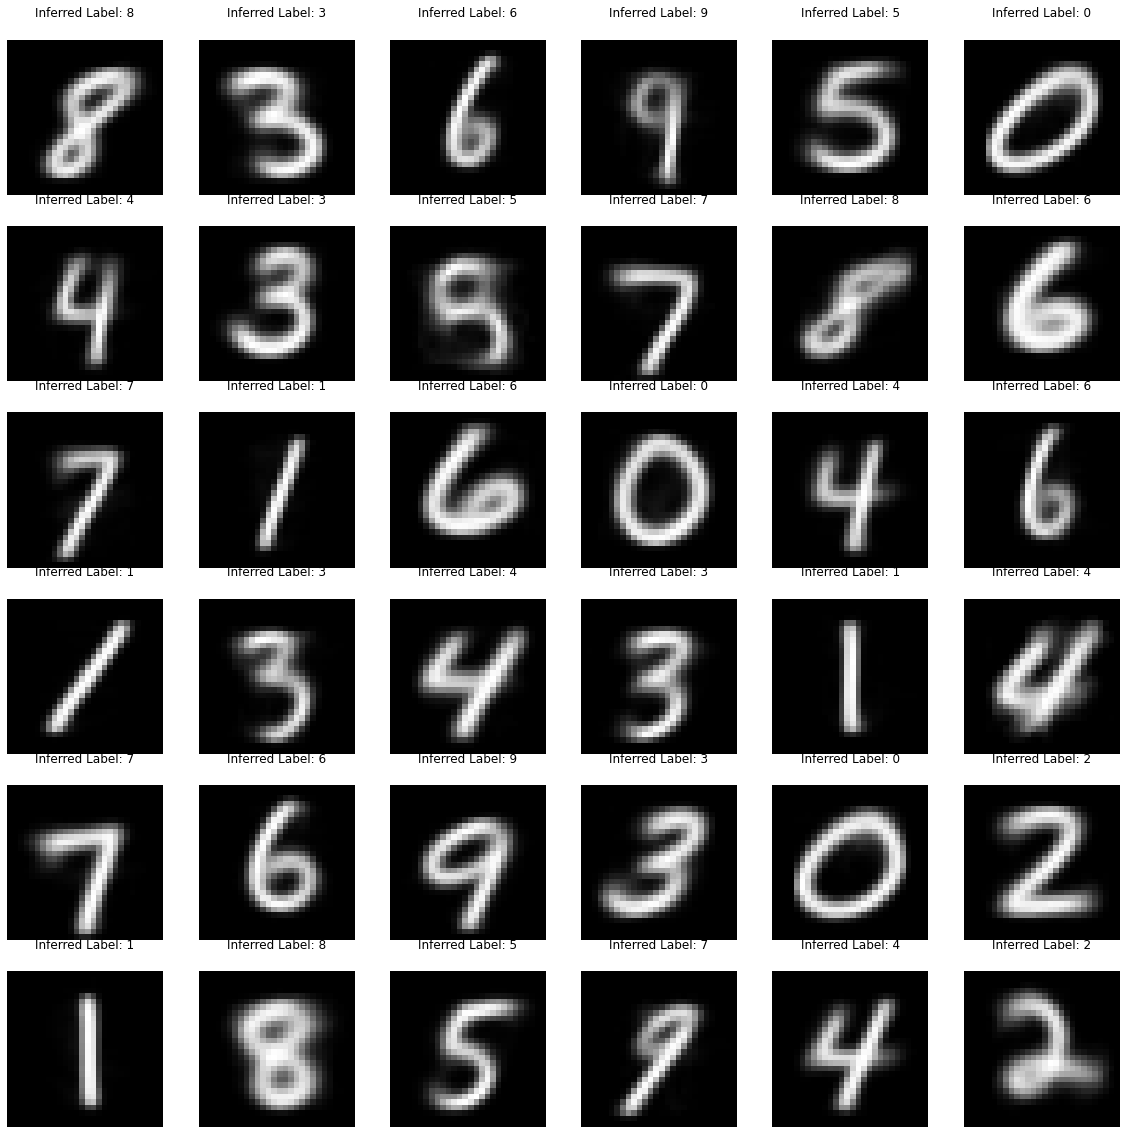

In [26]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(256, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()